In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [2]:
X_train = pd.read_csv('C:/Users/udin0/OneDrive/Documents/GitHub/Gazebo/Data/X_train.csv')
y_train = pd.read_csv('C:/Users/udin0/OneDrive/Documents/GitHub/Gazebo/Data/y_train.csv')
X_test_1 = pd.read_csv('C:/Users/udin0/OneDrive/Documents/GitHub/Gazebo/Data/X_test_1.csv')
X_test_2 = pd.read_csv('C:/Users/udin0/OneDrive/Documents/GitHub/Gazebo/Data/X_test_2.csv')
y_test_2_reduced = pd.read_csv('C:/Users/udin0/OneDrive/Documents/GitHub/Gazebo/Data/y_test_2_reduced.csv')

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.617940,-0.39198,0.13278,0.032551,0.55201,0.83393,-0.837550,-0.87406,0.43930,0.26826,...,-0.45454,0.36452,1.57530,-0.620320,-0.25371,-0.44775,-0.038273,-0.019938,-0.195500,0.428830
1,0.333860,-1.54910,1.67050,0.793560,0.80251,-0.07206,-0.068276,3.30240,0.52045,0.68572,...,-0.36913,1.74080,1.28660,-0.013396,-1.53930,0.83354,0.472610,0.513030,-0.743140,1.219900
2,0.040399,-0.60807,1.62080,-0.355970,0.12105,1.35250,0.373200,1.11170,0.35894,-0.34410,...,-1.40230,-0.24763,0.50705,0.708220,-0.60083,0.91104,0.009979,-0.475990,-0.094731,-0.008521
3,1.723600,0.19529,1.03880,-3.009100,-0.33222,0.91067,0.666690,0.71725,3.05850,1.48990,...,-1.21540,-0.25284,-1.30780,-0.445660,0.27918,0.26467,-0.149360,1.492900,-1.176700,-1.854500
4,-1.032300,1.90010,-1.46010,0.383710,-0.51039,0.74481,-0.914660,-0.86588,-0.34426,0.86965,...,1.32230,0.06020,-1.07900,-0.617050,1.18450,-0.21063,-0.105870,-0.412040,1.409700,0.133350


In [4]:
X_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
9995,0.82100,-0.016804,0.36978,-1.65250,1.32370,-0.67655,-1.23800,-0.764210,0.16283,-0.240030,...,-1.25470,-0.76602,1.453600,1.954500,0.47550,-1.824700,-0.22703,1.87970,-1.123800,1.309600
9996,-0.63639,-0.403470,0.81521,-0.66599,-2.16210,2.03190,0.27891,0.169180,0.52821,-0.217570,...,0.42273,-0.07438,-0.958710,-0.030666,-0.43114,0.075285,-0.89237,-0.67732,-1.330200,-0.809090
9997,0.77341,0.157330,-0.82969,-2.56910,1.33060,-0.45354,0.15480,0.010011,0.79613,0.606680,...,-1.15410,-1.75520,-1.645100,0.316050,-0.49966,0.997910,-1.38980,0.77325,0.049626,-0.500440
9998,-0.38297,1.011900,-2.12320,1.38560,0.30195,-0.45940,-0.05027,0.591280,1.49210,0.012371,...,0.24839,0.20263,0.010861,-0.775840,-0.98314,0.216800,1.32380,0.45036,1.586200,-0.289050
9999,-1.29450,0.530550,-0.36347,-0.29003,-0.54796,0.34670,0.88447,0.068771,0.20570,1.329000,...,-0.24242,-1.04060,-1.105600,-0.020739,0.78016,0.151230,0.59785,-0.79061,0.508300,0.024349


In [5]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.021449,-0.000912,0.012368,0.045447,0.034961,0.070815,0.074531,0.049599,0.027968,0.055083,...,0.003136,-0.021765,-0.091785,0.080681,0.075869,0.021120,0.055394,0.013260,-0.045870,-0.096509
std,0.986789,1.008141,1.009709,0.985909,0.988168,0.990837,0.975877,1.014643,0.996102,1.034924,...,1.030756,0.993863,0.974188,0.969610,1.026368,1.002988,1.000607,0.990364,0.994845,0.992540
min,-8.163800,-11.982000,-3.502000,-4.704000,-7.017800,-4.991400,-5.802900,-3.559200,-6.818100,-13.353000,...,-4.359300,-6.069700,-5.830000,-4.047800,-3.770400,-4.435800,-3.708900,-8.598300,-5.669100,-5.210500
25%,-0.629273,-0.601035,-0.652678,-0.567387,-0.589565,-0.570862,-0.488445,-0.636760,-0.559490,-0.496065,...,-0.621422,-0.618745,-0.727640,-0.499472,-0.516375,-0.600855,-0.574335,-0.556127,-0.688122,-0.779593
50%,-0.026099,0.026874,-0.042700,0.069475,0.026490,0.071909,0.098494,0.014708,0.050312,0.143520,...,-0.004454,-0.001942,-0.123345,0.119180,0.052484,0.029948,0.027084,0.054325,-0.040731,-0.121505
75%,0.581712,0.627327,0.620073,0.677163,0.639463,0.704340,0.666788,0.691455,0.647860,0.745035,...,0.600202,0.609105,0.551413,0.698022,0.636352,0.658850,0.663262,0.644168,0.609800,0.558490
max,4.575000,4.232200,6.586800,3.867900,7.705200,5.112700,10.495000,4.853900,4.515200,2.694500,...,11.979000,4.113700,3.634700,4.362200,19.196000,4.660800,11.429000,3.945100,4.264900,4.185400


In [6]:
y_train.head()

,label
0,10
1,5
2,5
3,5
4,5


In [7]:
y_train.tail()

,label
9995,19
9996,5
9997,17
9998,24
9999,5


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 22.9 MB


In [9]:
missing_counts = X_train.isnull().sum()
print(missing_counts[missing_counts > 0])

Series([], dtype: int64)


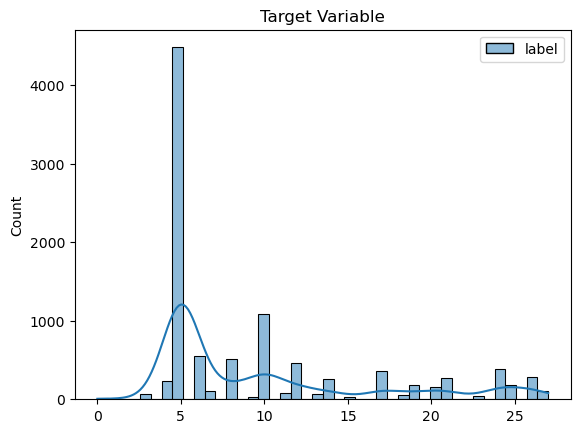

In [10]:
# Numerical variable example
sns.histplot(y_train, kde=True)
plt.title('Target Variable')
plt.show()

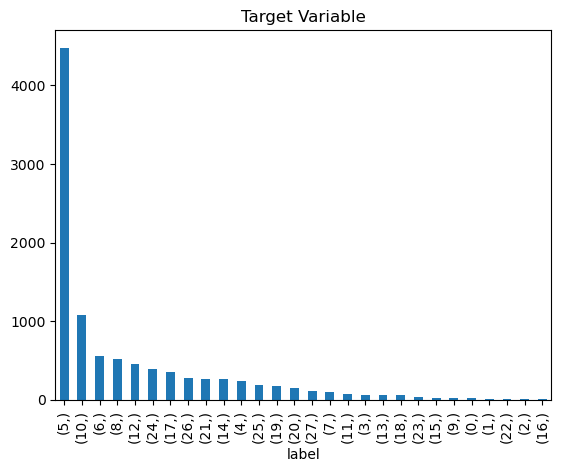

In [11]:
y_train.value_counts().plot(kind='bar')
plt.title('Target Variable')
plt.show()

In [12]:
corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)]  # Threshold = 0.95
X_filtered = X_train.drop(to_drop, axis=1)
print(f"Features after correlation filter: {X_filtered.shape[1]}")

Features after correlation filter: 300


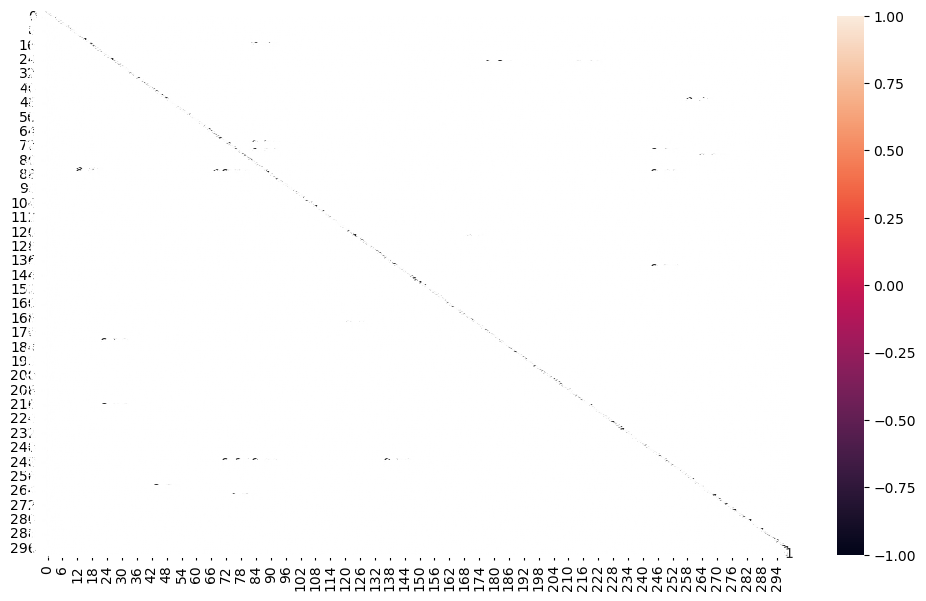

In [13]:
plt.figure(figsize=(12, 7))
sns.heatmap(X_train.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Model-Based Feature Importance

Logistic Regression

In [14]:
model = LogisticRegression(
    multi_class='multinomial',
    class_weight='balanced',
    max_iter=1000
)
model.fit(X_train, y_train)

# Feature importance per class (shape: [n_classes, n_features])
importance_per_class = np.abs(model.coef_)

# Create a DataFrame to store results
top_features_df = pd.DataFrame(columns=['Class', 'Top_5_Features'])

for class_idx in range(28):
    # Get indices of top 5 features for this class
    top_feature_indices = np.argsort(importance_per_class[class_idx])[-5:][::-1]
    
    # Get feature names and importance scores
    top_feature_names = X_train.columns[top_feature_indices].tolist()
    top_feature_scores = importance_per_class[class_idx][top_feature_indices].round(4)
    
    # Combine names and scores for readability
    top_features_with_scores = [
        f"{name} ({score})" for name, score in zip(top_feature_names, top_feature_scores)
    ]
    
    # Append to DataFrame
    top_features_df.loc[class_idx] = [
        f"Class_{class_idx}", 
        ", ".join(top_features_with_scores)
    ]

# Display the results
print(top_features_df.to_markdown(index=False))

c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| Class    | Top_5_Features                                                      |
|:---------|:--------------------------------------------------------------------|
| Class_0  | 126 (1.1606), 221 (1.1164), 160 (1.0255), 210 (0.933), 67 (0.8855)  |
| Class_1  | 190 (0.4111), 122 (0.4009), 148 (0.3798), 91 (0.3658), 42 (0.3647)  |
| Class_2  | 278 (0.7246), 69 (0.7083), 136 (0.5274), 125 (0.5117), 58 (0.4815)  |
| Class_3  | 45 (1.5724), 4 (1.3429), 157 (1.3002), 66 (1.2308), 236 (1.1932)    |
| Class_4  | 112 (1.4238), 9 (1.4065), 206 (1.3361), 79 (1.2683), 198 (1.192)    |
| Class_5  | 141 (0.7806), 13 (0.7786), 174 (0.7624), 111 (0.7231), 34 (0.6953)  |
| Class_6  | 76 (0.9345), 134 (0.9093), 243 (0.8822), 142 (0.8641), 58 (0.8535)  |
| Class_7  | 13 (1.297), 264 (1.133), 169 (1.1028), 19 (1.0894), 69 (1.0741)     |
| Class_8  | 111 (1.2281), 249 (1.1552), 155 (1.1408), 268 (1.0929), 146 (1.057) |
| Class_9  | 142 (1.1489), 239 (1.1321), 231 (0.9159), 177 (0.8933), 71 (0.818)  |
| Cl

In [15]:
# Dictionary to store top 5 features per class
top_features_per_class = {}

for class_idx in range(28):
    top_feature_indices = np.argsort(importance_per_class[class_idx])[-5:][::-1]
    top_feature_names = X_train.columns[top_feature_indices].tolist()
    top_features_per_class[f"Class_{class_idx}"] = top_feature_names

# Flatten all top 5 features into a single list
all_top_features = [feature for features in top_features_per_class.values() for feature in features]

# Count occurrences of each feature
feature_counts = Counter(all_top_features)

# Get the 10 most common features
top_10_global_features = feature_counts.most_common(30)

# Convert to DataFrame for readability
top_10_df = pd.DataFrame(top_10_global_features, columns=['Feature', 'Number_of_Classes_Where_Top_5'])

<Figure size 1000x600 with 0 Axes>

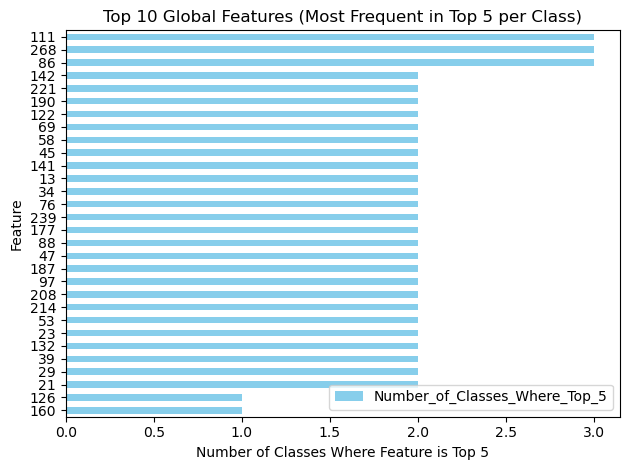

In [16]:
plt.figure(figsize=(10, 6))
top_10_df.sort_values(by='Number_of_Classes_Where_Top_5').plot.barh(
    x='Feature', 
    y='Number_of_Classes_Where_Top_5',
    color='skyblue'
)
plt.title("Top 10 Global Features (Most Frequent in Top 5 per Class)")
plt.xlabel("Number of Classes Where Feature is Top 5")
plt.tight_layout()
plt.show()

Random Forest

c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


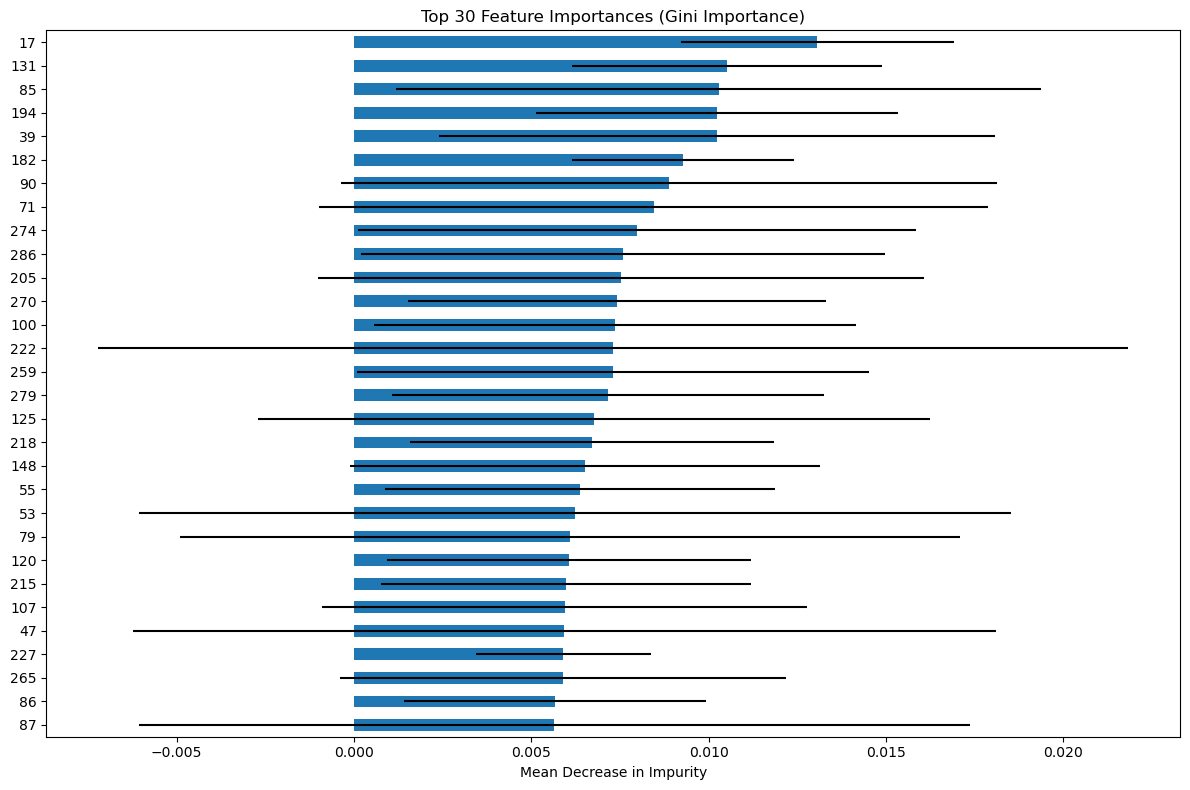

              precision    recall  f1-score   support

     Class_0       0.00      0.00      0.00         4
     Class_1       0.00      0.00      0.00         1
     Class_2       0.00      0.00      0.00         1
     Class_3       0.33      0.15      0.21        13
     Class_4       0.49      0.50      0.49        48
     Class_5       0.87      0.78      0.82       896
     Class_6       0.88      0.94      0.91       111
     Class_7       0.25      0.67      0.36        21
     Class_8       0.52      0.79      0.63       103
     Class_9       0.00      0.00      0.00         5
    Class_10       0.68      0.70      0.69       216
    Class_11       0.54      0.44      0.48        16
    Class_12       0.39      0.34      0.36        91
    Class_13       0.00      0.00      0.00        12
    Class_14       0.08      0.28      0.13        53
    Class_15       1.00      0.20      0.33         5
    Class_16       0.00      0.00      0.00         1
    Class_17       0.61    

c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# 1. Data Preparation
# Convert to numpy if input is pandas DataFrame
X = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y = y_train.values if isinstance(y_train, pd.Series) else y_train

# Stratified train-test split
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Baseline Random Forest Model
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced_subsample',  # Handles imbalance
    max_depth=10,                      # Prevent overfitting
    n_jobs=-1,                         # Parallel processing
    random_state=42
)
rf.fit(X_train_split, y_train_split)

# 3. Get Feature Importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# 4. Visualize Top Features
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"f_{i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(12, 8))
forest_importances.sort_values().tail(30).plot.barh(xerr=std[-30:])
plt.title("Top 30 Feature Importances (Gini Importance)")
plt.xlabel("Mean Decrease in Impurity")
plt.tight_layout()
plt.show()

# 5. Evaluate Performance
y_pred = rf.predict(X_val)
print(classification_report(y_val, y_pred, target_names=[f"Class_{i}" for i in range(28)]))

Greedy Feature Selection

In [18]:
X_test_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.026269,0.005698,-0.000396,-0.025068,-0.036519,0.011354,-0.004762,0.020185,0.016559,-0.021265,...,0.029056,0.036645,-0.019161,0.038700,0.000904,0.009513,-0.030160,0.022381,-0.005432,0.002974
std,0.927147,0.988253,0.982228,1.014067,0.975428,0.992557,1.006523,1.017382,0.963456,0.991318,...,0.997003,1.036724,1.011397,0.968466,1.044488,1.024911,0.957195,1.000461,1.000382,0.970778
min,-3.437800,-12.214000,-2.749000,-3.534100,-3.626500,-3.276100,-3.581500,-2.919200,-3.234300,-12.124000,...,-3.126400,-4.190400,-4.462400,-3.491800,-2.614600,-3.480600,-3.071300,-5.171100,-5.280700,-4.515200
25%,-0.601160,-0.583930,-0.629933,-0.639713,-0.693790,-0.633382,-0.602320,-0.641902,-0.576490,-0.578465,...,-0.582228,-0.571588,-0.670008,-0.583218,-0.588853,-0.625912,-0.629645,-0.554645,-0.659470,-0.669623
50%,0.003116,0.043968,-0.046697,-0.001509,-0.052870,-0.012967,0.027700,-0.007249,0.001415,0.084885,...,-0.011416,0.062720,-0.037479,0.057587,0.013508,-0.005384,-0.054165,0.102145,-0.037167,-0.021192
75%,0.570048,0.555813,0.597265,0.631503,0.622795,0.672975,0.606260,0.675165,0.625550,0.636645,...,0.624478,0.678047,0.622560,0.611997,0.603210,0.641682,0.528150,0.667338,0.647763,0.658828
max,3.534000,3.163500,4.365700,3.500900,3.508500,4.943600,10.395000,3.122500,4.240500,2.192700,...,10.510000,4.144900,4.248500,3.842700,17.671000,3.846700,10.407000,3.276900,4.155600,3.616700


In [19]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)

In [20]:
print(y_train_split)

      label
9254     17
1561     10
1670      8
6087     17
6669     26
...     ...
5734     18
5191      5
5390     10
860       5
7270      5

[8000 rows x 1 columns]


In [21]:
n_features = X_train_scaled.shape[1]
current_features = list(range(n_features))
num_features = []
accuracies = []
f1_scores = []
selected_features_history = []

while len(current_features) > 0:
    # Train model on current features
    model = LogisticRegression(
        multi_class='multinomial',
        class_weight='balanced',
        penalty=None,
        solver='lbfgs',
        max_iter=1000
    )
    model.fit(X_train_scaled[:, current_features], y_train_split)
    
    # Predict and compute metrics
    y_pred = model.predict(X_val_scaled[:, current_features])
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')
    
    # Store results
    num_features.append(len(current_features))
    accuracies.append(acc)
    f1_scores.append(f1)
    selected_features_history.append(current_features.copy())
    
    # Break if only one feature remains
    if len(current_features) == 1:
        break
    
    # Remove feature with smallest mean absolute coefficient
    coefs = np.abs(model.coef_)
    mean_abs_coefs = np.mean(coefs, axis=0)
    worst_feature_idx = np.argmin(mean_abs_coefs)
    del current_features[worst_feature_idx]

c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Optimal number of features: 224
Best F1-score (Macro): 0.3986


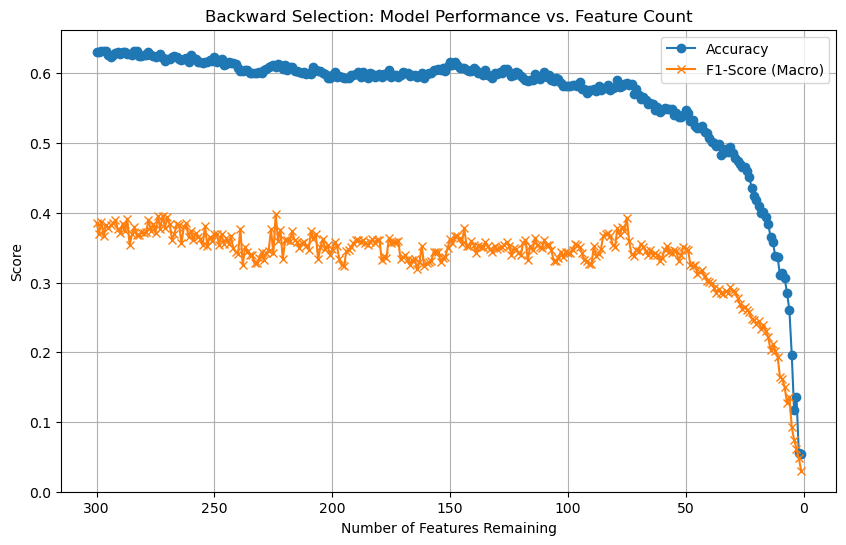

In [22]:
best_idx = np.argmax(f1_scores)
best_num_features = num_features[best_idx]
best_f1 = f1_scores[best_idx]
best_features = selected_features_history[best_idx]

print(f"Optimal number of features: {best_num_features}")
print(f"Best F1-score (Macro): {best_f1:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, label='Accuracy', marker='o')
plt.plot(num_features, f1_scores, label='F1-Score (Macro)', marker='x')
plt.xlabel("Number of Features Remaining")
plt.ylabel("Score")
plt.title("Backward Selection: Model Performance vs. Feature Count")
plt.gca().invert_xaxis()  # Reverse x-axis (from 300 to 0)
plt.legend()
plt.grid()
plt.show()

Comment:

We should think of which feature to select after handling imbalanced dataset, and the most suitable for now is smote.

In [23]:
# 1. Check minimum class count
min_class_count = min(np.unique(y_train, return_counts=True)[1])
print(f"Smallest class has {min_class_count} samples")

# 2. Safe SMOTE application
safe_k_neighbors = min(5, min_class_count - 1)  # Ensure k_neighbors < min_class_count
smote = SMOTE(random_state=42, k_neighbors=safe_k_neighbors)

try:
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("SMOTE successful!")
    print(f"New class distribution: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")
except ValueError as e:
    print(f"SMOTE failed: {e}")
    print("Falling back to RandomOverSampler for classes with <6 samples")
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Smallest class has 6 samples
SMOTE successful!
New class distribution: {0: 4479, 1: 4479, 2: 4479, 3: 4479, 4: 4479, 5: 4479, 6: 4479, 7: 4479, 8: 4479, 9: 4479, 10: 4479, 11: 4479, 12: 4479, 13: 4479, 14: 4479, 15: 4479, 16: 4479, 17: 4479, 18: 4479, 19: 4479, 20: 4479, 21: 4479, 22: 4479, 23: 4479, 24: 4479, 25: 4479, 26: 4479, 27: 4479}


In [24]:
model = LogisticRegression(
    multi_class='multinomial',
    class_weight='balanced',
    max_iter=1000
)
model.fit(X_train_resampled, y_train_resampled)

# Feature importance per class (shape: [n_classes, n_features])
importance_per_class = np.abs(model.coef_)

# Create a DataFrame to store results
top_features_df = pd.DataFrame(columns=['Class', 'Top_5_Features'])

for class_idx in range(28):
    # Get indices of top 5 features for this class
    top_feature_indices = np.argsort(importance_per_class[class_idx])[-5:][::-1]
    
    # Get feature names and importance scores
    top_feature_names = X_train_resampled.columns[top_feature_indices].tolist()
    top_feature_scores = importance_per_class[class_idx][top_feature_indices].round(4)
    
    # Combine names and scores for readability
    top_features_with_scores = [
        f"{name} ({score})" for name, score in zip(top_feature_names, top_feature_scores)
    ]
    
    # Append to DataFrame
    top_features_df.loc[class_idx] = [
        f"Class_{class_idx}", 
        ", ".join(top_features_with_scores)
    ]

# Display the results
print(top_features_df.to_markdown(index=False))

c:\Users\udin0\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| Class    | Top_5_Features                                                       |
|:---------|:---------------------------------------------------------------------|
| Class_0  | 126 (2.0481), 221 (1.7137), 160 (1.6885), 284 (1.6056), 210 (1.5564) |
| Class_1  | 148 (0.8775), 42 (0.7396), 247 (0.7218), 114 (0.7153), 70 (0.6967)   |
| Class_2  | 278 (1.2592), 69 (1.1288), 136 (0.8992), 129 (0.7745), 125 (0.7575)  |
| Class_3  | 4 (2.5427), 45 (2.5339), 157 (2.2184), 236 (2.0381), 66 (1.9739)     |
| Class_4  | 9 (2.9498), 112 (2.6557), 79 (2.4965), 166 (2.4402), 290 (2.3395)    |
| Class_5  | 174 (1.8054), 60 (1.7682), 111 (1.6848), 115 (1.5785), 141 (1.4825)  |
| Class_6  | 298 (1.7413), 58 (1.7136), 257 (1.6863), 76 (1.6579), 134 (1.574)    |
| Class_7  | 13 (2.4823), 251 (2.042), 264 (2.0093), 2 (1.9766), 285 (1.9651)     |
| Class_8  | 111 (2.7814), 268 (2.4191), 249 (2.323), 155 (2.3127), 223 (2.1771)  |
| Class_9  | 239 (2.0341), 142 (1.7778), 240 (1.7124), 231 (1.6058), 71 (1.5

In [25]:
# Dictionary to store top 5 features per class
top_features_per_class = {}

for class_idx in range(28):
    top_feature_indices = np.argsort(importance_per_class[class_idx])[-5:][::-1]
    top_feature_names = X_train_resampled.columns[top_feature_indices].tolist()
    top_features_per_class[f"Class_{class_idx}"] = top_feature_names

# Flatten all top 5 features into a single list
all_top_features = [feature for features in top_features_per_class.values() for feature in features]

# Count occurrences of each feature
feature_counts = Counter(all_top_features)

# Get the 10 most common features
top_10_global_features = feature_counts.most_common(30)

# Convert to DataFrame for readability
top_10_df = pd.DataFrame(top_10_global_features, columns=['Feature', 'Number_of_Classes_Where_Top_5'])

<Figure size 1000x600 with 0 Axes>

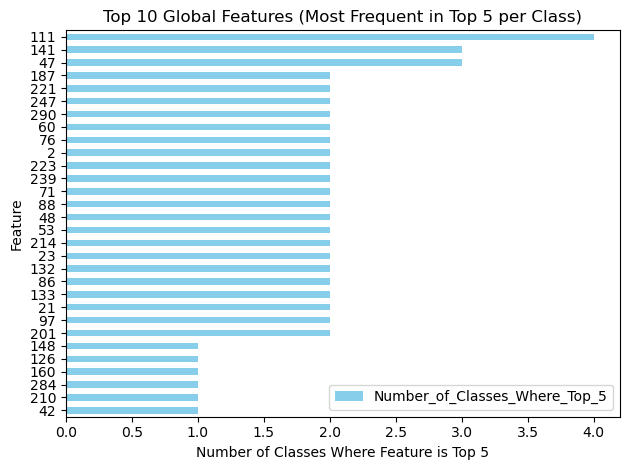

In [26]:
plt.figure(figsize=(10, 6))
top_10_df.sort_values(by='Number_of_Classes_Where_Top_5').plot.barh(
    x='Feature', 
    y='Number_of_Classes_Where_Top_5',
    color='skyblue'
)
plt.title("Top 10 Global Features (Most Frequent in Top 5 per Class)")
plt.xlabel("Number of Classes Where Feature is Top 5")
plt.tight_layout()
plt.show()